In [ ]:
from embeddings import GloveEmbedding, FastTextEmbedding

In [1]:
import numpy as np

from nltk.tokenize import sent_tokenize, word_tokenize
import warnings
warnings.filterwarnings(action = 'ignore')
 
import gensim
from gensim.models import Word2Vec, FastText
import pandas as pd
from gensim.utils import simple_preprocess
from gensim.models import KeyedVectors, FastText
from gensim import models

In [2]:
# word2vec_path = "/home/karm/karm_8T/embeddings/wordtovec/GoogleNews-vectors-negative300.bin.gz"
# w2v_model = models.KeyedVectors.load_word2vec_format(word2vec_path, binary=True)

# model_path = "/home/karm/karm_8T/embeddings/fasttext/wiki-news-300d-1M.vec"
# ft_model = models.KeyedVectors.load_word2vec_format(model_path)
# model = ft_model

model_path = "/home/karm/karm_8T/embeddings/fasttext/crawl-300d-2M-subword.bin"
ft_model = FastText.load_fasttext_format(model_path)
model = ft_model.wv

/home/karm/miniconda3/envs/torch37/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `load_fasttext_format` (use load_facebook_vectors (to use pretrained embeddings) or load_facebook_model (to continue training with the loaded full model, more RAM) instead).
  if sys.path[0] == "":


In [3]:
model.similarity("shoes","university")

0.25400066

In [4]:
model["alokwlcd"] #OoV handling

array([-0.00707852, -0.02047246,  0.05881367,  0.02716566,  0.00643048,
       -0.0723402 ,  0.01739277,  0.0193181 , -0.03043089, -0.03515377,
        0.00977802, -0.00776978,  0.01736763, -0.00835331,  0.0017135 ,
       -0.02628151,  0.02115601,  0.01426279,  0.02096461, -0.00731205,
       -0.00760224, -0.02462225, -0.00832718,  0.00256635, -0.04368203,
        0.0271911 , -0.10531273,  0.0301073 ,  0.01034641, -0.0252064 ,
       -0.02112975, -0.00563607, -0.02726468,  0.01614374,  0.01965702,
       -0.02949228,  0.02880771,  0.00392867,  0.00592084,  0.01363917,
       -0.03160523, -0.05507934, -0.00380419, -0.00375819,  0.02180936,
        0.0718902 , -0.00805254, -0.01753271, -0.01452723, -0.00027653,
       -0.02285302,  0.00174166,  0.01675   ,  0.00954768, -0.04940724,
        0.00881833,  0.00740869, -0.04042297,  0.04220759, -0.02088748,
        0.0133517 , -0.02707481, -0.05293711, -0.01553095, -0.03796826,
        0.00598069, -0.02043743, -0.02528773,  0.00756693, -0.03

In [14]:
file_path = "dataset_splits/ClassificationDataset-train0.xlsx"

In [15]:
df = pd.read_excel(file_path)
df

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,positive,The company booked April-June new orders worth...
1,neutral,Lemminkainen Infra Oy 's subsidiary Lemminkain...
2,neutral,"GUANGDONG , October 26 , SinoCast -- Nokia Tel..."
3,positive,"According to Kesko , the company agreed with t..."
4,positive,New product launches in Finland will more than...
...,...,...
2792,neutral,It posted a turnover of 4.5 mln euro $ 6.1 mln...
2793,neutral,The group posted net sales of 35.3 mln euro $ ...
2794,neutral,"The contract value amounts to about EUR11m , t..."
2795,neutral,Country : ; Germany Sector : Construction-Real...


In [18]:
list(df["neutral"].unique()).index("positive")

0

In [99]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/karm/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [100]:
simple_preprocess("hi my name is karm, your name is trankesh")

['hi', 'my', 'name', 'is', 'karm', 'your', 'name', 'is', 'trankesh']

In [101]:
sent_tokenize("hi my name is karm your name is trankesh")

['hi my name is karm your name is trankesh']

In [102]:
word_tokenize("hi my name is karm")

['hi', 'my', 'name', 'is', 'karm']

In [103]:
data = df["text"].apply(lambda x: word_tokenize(x)).to_list()
# data = df["text"].apply(lambda x: simple_preprocess(" ".join(word_tokenize(x)))).to_list()

In [104]:
data[5], df.iloc[5,1]

(['Citigroup',
  ',',
  'Inc',
  '(',
  'NYSE',
  ':',
  'C',
  ')',
  'has',
  'announced',
  'that',
  'its',
  'Global',
  'Transaction',
  'Services',
  '(',
  'GTS',
  ')',
  'business',
  'has',
  'been',
  'awarded',
  'a',
  'new',
  'mandate',
  'by',
  'Finland-based',
  'Pohjola',
  'Bank',
  'Group',
  '.'],
 'Citigroup , Inc ( NYSE : C ) has announced that its Global Transaction Services ( GTS ) business has been awarded a new mandate by Finland-based Pohjola Bank Group .')

In [108]:
for i,sent in enumerate(data):
    for word in sent:
        model.get_vector(word)
    print(i)

In [110]:
model.get_vector("phone").shape

(300,)

## FNN

In [131]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm
import matplotlib.pyplot as plt

In [132]:
DATASET_NO = 0
labels_dict = {'positive':1, 'neutral':0, 'negative':2}
get_file_path = lambda split: f"dataset_splits/ClassificationDataset-{split}{DATASET_NO}.xlsx"

In [133]:
def get_x_y(split="train"):
    file_path  = get_file_path(split)
    df = pd.read_excel(file_path, names=["label","text"])
    
    data = df["text"].apply(lambda x: word_tokenize(x)).to_list()
    X_train = torch.tensor(np.array([np.array([model.get_vector(word) for word in sent]).sum(axis=0) for i,sent in enumerate(data)]))
    y_train = torch.tensor(df["label"].apply(lambda x: labels_dict[x]))
    print(X_train.shape, y_train.shape)
    return X_train, y_train

In [134]:
X_train, y_train = get_x_y("train")
X_val, y_val = get_x_y("valid")

torch.Size([2797, 300]) torch.Size([2797])
torch.Size([1202, 300]) torch.Size([1202])


In [135]:
class Fnn(nn.Module):
    def __init__(self, d=300, n_classes=3):
        super(Fnn, self).__init__()
        self.layer_1 = nn.Linear(d,128)
        self.layer_2 = nn.Linear(128,n_classes)
        
    def forward(self, x):
        # x.shape = (b, 300)
        x = self.layer_1(x)
        x = F.relu(x)
        
        x = self.layer_2(x)
        x = F.log_softmax(x)
        
        return x # (b,3)
    
class DAN2(nn.Module):
    def __init__(self, d=300, n_classes=3):
        super(DAN2, self).__init__()
        self.layer_1 = nn.Linear(d,150)
        self.layer_2 = nn.Linear(150, 75)
        self.layer_3 = nn.Linear(75, n_classes)
        
        
    def forward(self, x):
        # x.shape = (b, 300)
        x = self.layer_1(x)
        x = F.relu(x)
        
        x = self.layer_2(x)
        x = F.relu(x)
        
        x = self.layer_3(x)
        x = F.log_softmax(x)
        
        return x # (b,3)

In [136]:
torch.cuda.is_available()

True

In [137]:
device = torch.device("cuda")
X_train, y_train = X_train.to(device), y_train.to(device)
X_val, y_val = X_val.to(device), y_val.to(device)

In [138]:
nn_model = Fnn().to(device)
# nn_model = DAN2().to(device)

In [139]:
# test
loss_fn = torch.nn.CrossEntropyLoss()

dummy_outputs = torch.exp(nn_model(X_train[:4,:]))
# Represents the correct class among the 10 being tested
dummy_labels = y_train[:4]

print(dummy_outputs)
print(dummy_labels)

loss = loss_fn(dummy_outputs, dummy_labels)
print('Total loss for this batch: {}'.format(loss.item()))

tensor([[0.3020, 0.4106, 0.2874],
        [0.2910, 0.4090, 0.3001],
        [0.2352, 0.4486, 0.3162],
        [0.2517, 0.4271, 0.3212]], device='cuda:0', grad_fn=<ExpBackward>)
tensor([1, 0, 0, 1], device='cuda:0')
Total loss for this batch: 1.093355417251587


In [140]:
optimizer = torch.optim.SGD(nn_model.parameters(),lr=0.01,momentum=0.9)

In [141]:
def get_accuracy(logits, y_true):
    return (torch.argmax(logits,axis=-1) == y_true).to(torch.float).mean()

In [142]:
running_loss = 0.
last_loss = 0.
batch_size = 64

train_losses = []
val_losses = []
val_accs = []
EPOCHS = 100

tq = tqdm(range(EPOCHS))
for epoch, _ in enumerate(tq):
    
    for i in range(0,X_train.shape[0],batch_size):
        # Every data instance is an input + label pair
        inputs, labels = X_train[i:i+batch_size, :], y_train[i:i+batch_size]

        # Zero your gradients for every batch!
        optimizer.zero_grad()

        # Make predictions for this batch
        outputs = nn_model(inputs)

        # Compute the loss and its gradients
        loss = loss_fn(outputs, labels)
        loss.backward()

        # Adjust learning weights
        optimizer.step()

        # Gather data and report
        running_loss += loss.item()
        
    val_accuracy = get_accuracy(nn_model(X_val), y_val)    
    tq.set_description_str(f"EPOCH: {epoch+1} LOSS: {batch_size*running_loss/X_train.shape[0]} Val Accuracy: {val_accuracy} Val Loss: {loss_fn(nn_model(X_val), y_val)}")
    
    if epoch%1 == 0:
        train_losses.append(batch_size*running_loss/X_train.shape[0])
        val_losses.append(loss_fn(nn_model(X_val), y_val))
        val_accs.append(val_accuracy)
    
    running_loss = 0

EPOCH: 100 LOSS: 0.25935899115989663 Val Accuracy: 0.7495840191841125 Val Loss: 0.7120609283447266: 100%|█| 100/100 [00:03<


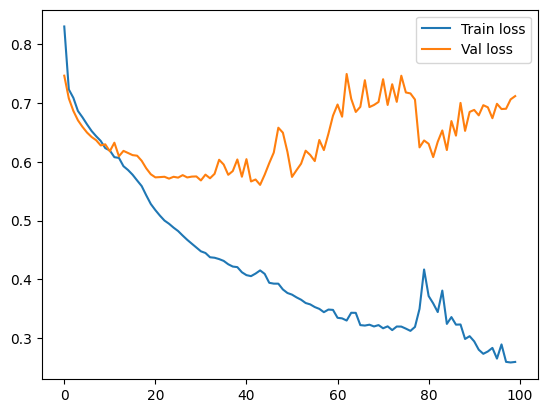

In [143]:
plt.plot(torch.tensor(train_losses).to("cpu"), label="Train loss")
plt.plot(torch.tensor(val_losses).to("cpu"), label="Val loss")
# plt.plot(torch.tensor(val_accs).to("cpu"))
plt.legend();

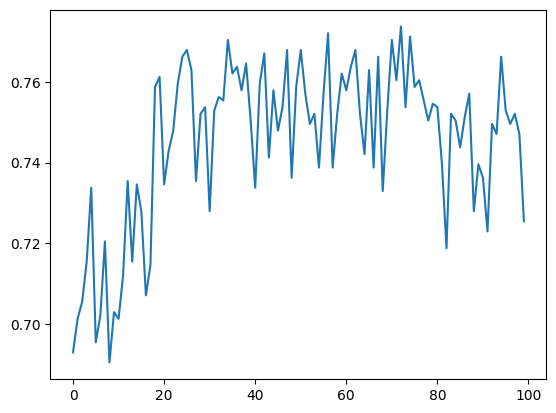

In [130]:
plt.plot(torch.tensor(val_accs).to("cpu"));

In [13]:
import glob
import cv2
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader


class CustomDataset(Dataset):
	def __init__(self):
		self.imgs_path = "Dog_Cat_Dataset/"
		file_list = glob.glob(self.imgs_path + "*")
		print(file_list)
		self.data = []
		for class_path in file_list:
			class_name = class_path.split("/")[-1]
			for img_path in glob.glob(class_path + "/*.jpeg"):
				self.data.append([img_path, class_name])
		print(self.data)
		self.class_map = {"dogs" : 0, "cats": 1}
		self.img_dim = (416, 416)
	
	def __len__(self):
		return len(self.data)

	def __getitem__(self, idx):
		img_path, class_name = self.data[idx]
		img = cv2.imread(img_path)
		img = cv2.resize(img, self.img_dim)
		class_id = self.class_map[class_name]
		img_tensor = torch.from_numpy(img)
		img_tensor = img_tensor.permute(2, 0, 1)
		class_id = torch.tensor([class_id])
		return img_tensor, class_id

if __name__ == "__main__":
	dataset = CustomDataset()		
	data_loader = DataLoader(dataset, batch_size=4, shuffle=True)
	for imgs, labels in data_loader:
		print("Batch of images has shape: ",imgs.shape)
		print("Batch of labels has shape: ", labels.shape)

[]
[]


ValueError: num_samples should be a positive integer value, but got num_samples=0

In [19]:
g.em

TypeError: __init__() missing 1 required positional argument: 'emb_model'